In [7]:
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


In [8]:
np.random.seed(0)

X, y = datasets.make_circles(n_samples=1000, factor=.3, noise=0.15)

Text(0, 0.5, '$x_2$')

<Figure size 432x288 with 0 Axes>

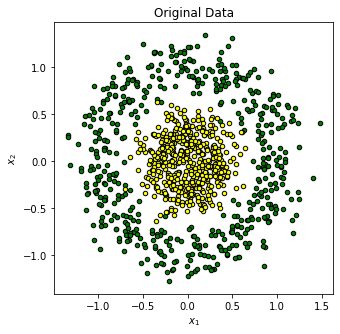

In [9]:
plt.figure()
plt.subplots(1,1,figsize=(5,5))
# plt.subplot(1,2,3, projection='polar')
plt.title("Original Data")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="green",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="yellow",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

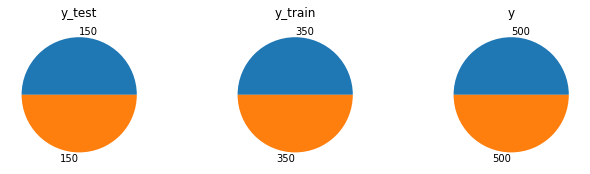

In [11]:
k = np.bincount(y)
m = np.bincount(y_test)
n = np.bincount(y_train)
fig = plt.figure()
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(m,labels=m)
ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(n,labels=n)
ax3 = fig.add_axes([1, .0, .5, .5], aspect=1)
ax3.pie(k,labels=k)

ax1.set_title('y_test')
ax2.set_title('y_train')
ax3.set_title('y')
plt.show()
pass

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_scale = sc.transform(X_train)
X_test_scale= sc.transform(X_test)

## LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_scale, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

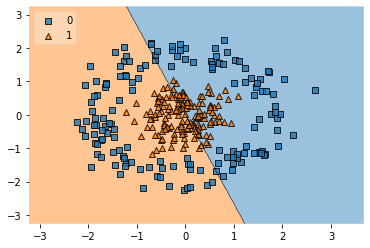

In [14]:
plot_decision_regions(X_test_scale, y_test, clf=lr, legend=2)

## Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scale, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

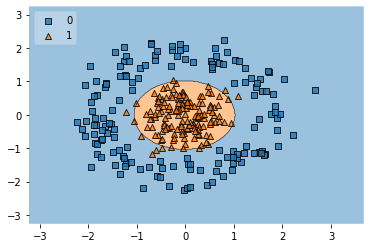

In [16]:
plot_decision_regions(X_test_scale, y_test, clf=nb, legend=2)

## Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=5, 
                                    random_state=1)
tree_model.fit(X_train_scale, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

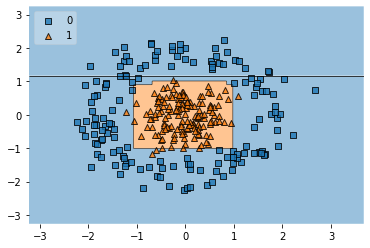

In [18]:
plot_decision_regions(X_test_scale, y_test, clf=tree_model, legend=2)

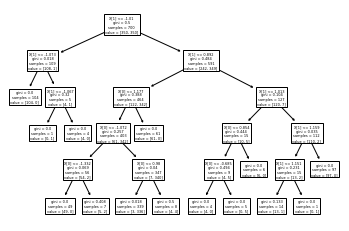

In [19]:
from sklearn import tree

tree.plot_tree(tree_model)
#plt.savefig('data/tree.pdf')
plt.show()

In [20]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_model,filled=True, 
                           rounded=True) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('dtree.png') 

True

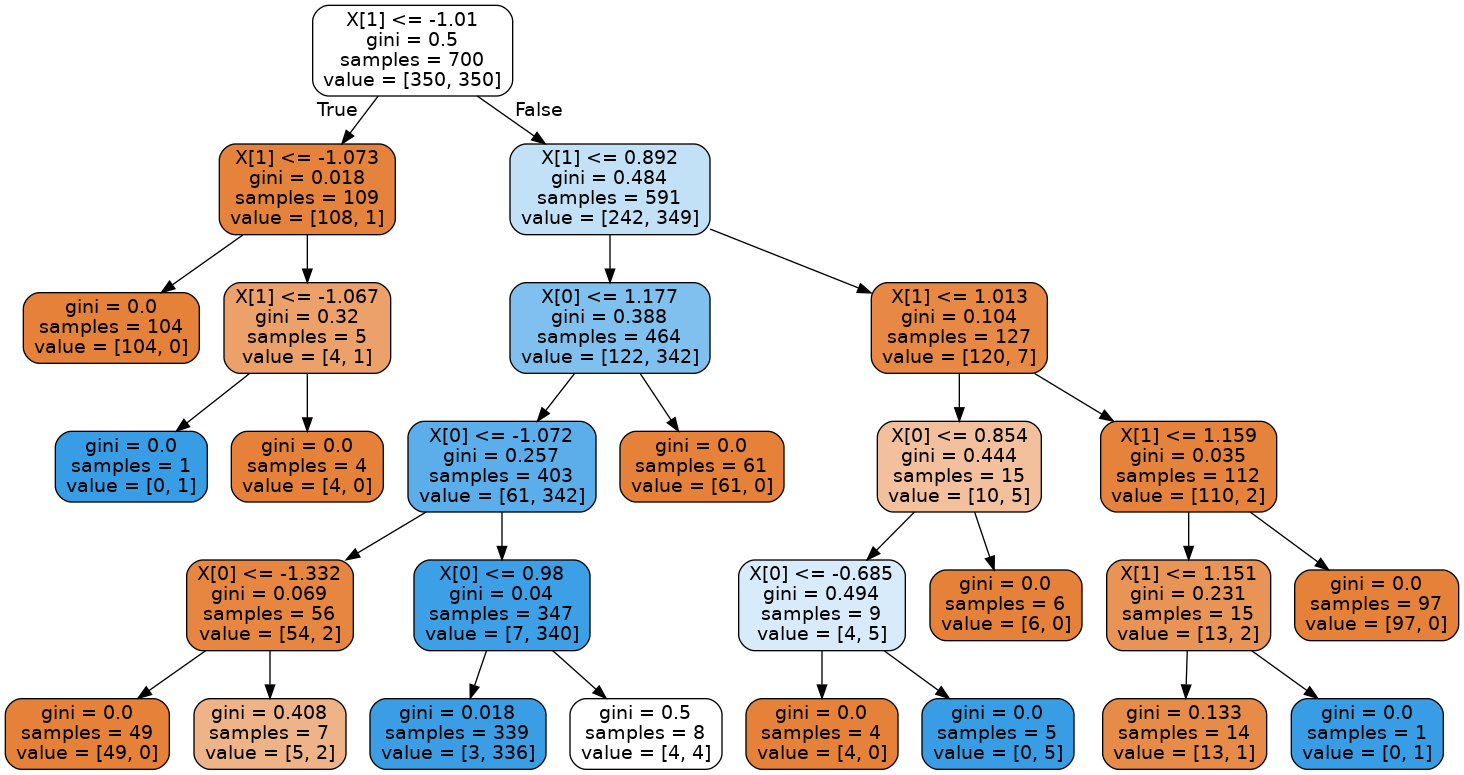

In [21]:
from IPython.display import Image
Image(filename='dtree.png', width=1000)

In [22]:
from sklearn.ensemble import RandomForestClassifier

rcf = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
rcf.fit(X_train_scale, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=2,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

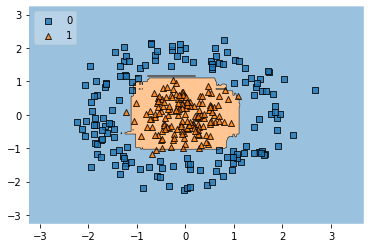

In [23]:
plot_decision_regions(X_test_scale, y_test, clf=rcf, legend=2)

## K-nearest neighbors

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_scale, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

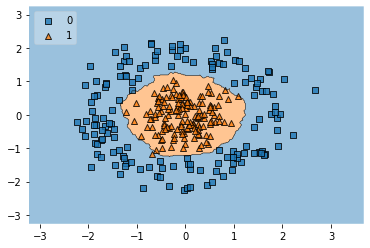

In [25]:
plot_decision_regions(X_test_scale, y_test, clf=knn, legend=2)

## XGBoost

In [26]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier()
xgb_model.fit(X_train_scale, y_train)
# model.score(X_test,y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

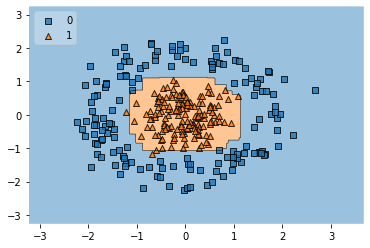

In [27]:
plot_decision_regions(X_test_scale, y_test, clf=xgb_model, legend=2)

## Moon and Blob

In [28]:
from sklearn.datasets import make_moons, make_blobs

In [37]:
np.random.seed(10)

X_moon, y_moon = make_moons(n_samples=1000, noise=0.15)

Text(0, 0.5, '$x_2$')

<Figure size 432x288 with 0 Axes>

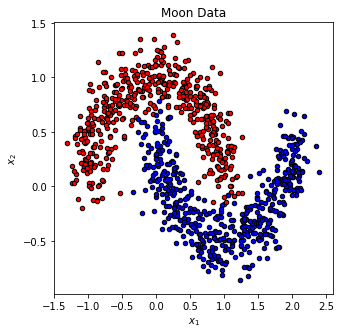

In [39]:
plt.figure()
plt.subplots(1,1,figsize=(5,5))
# plt.subplot(1,2,3, projection='polar')
plt.title("Moon Data")
reds = y_moon == 0
blues = y_moon == 1

plt.scatter(X_moon[reds, 0], X_moon[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_moon[blues, 0], X_moon[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [40]:
np.random.seed(0)

X_blob,y_blob = make_blobs(n_samples=1000,n_features=3)

In [41]:
xgb_blob_model=xgb.XGBClassifier()
xgb_blob_model.fit(X_blob,y_blob)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [42]:
y_pred = xgb_blob_model.predict(X_blob)

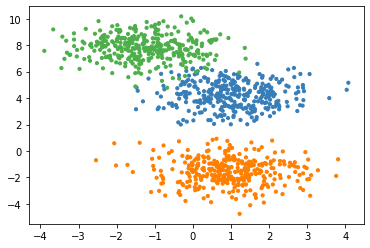

In [44]:
from itertools import cycle, islice
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
plt.scatter(X_blob[:, 0], X_blob[:, 1], s=10, color=colors[y_blob])

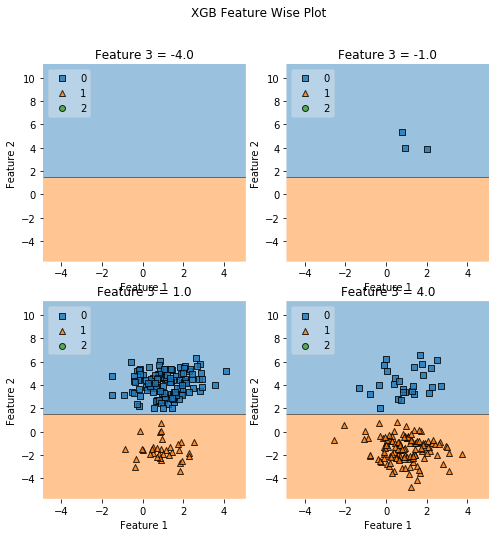

In [45]:
fig, axarr = plt.subplots(2, 2, figsize=(8,8), sharex=True, sharey=True)
values = [-4.0, -1.0, 1.0, 4.0]
width = 0.75
for value, ax in zip(values, axarr.flat):
    plot_decision_regions(X_blob, y_blob, clf=xgb_blob_model,
                          filler_feature_values={2: value},
                          filler_feature_ranges={2: width},
                          legend=2, ax=ax)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Feature 3 = {}'.format(value))
    
fig.suptitle('XGB Feature Wise Plot')
plt.show()